In [1]:

import sys
import numpy as np

import pickle as pkl

from os.path import join as oj
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
save_path = "../results_for_export"

In [3]:
x_train = np.load(oj("../data/ColorMNIST", "train_x.npy"))/255.0
y_train = np.load(oj("../data/ColorMNIST", "train_y.npy"))

In [4]:
x_test = np.load(oj("../data/ColorMNIST", "test_x.npy"))/255.0
y_test = np.load(oj("../data/ColorMNIST", "test_y.npy"))

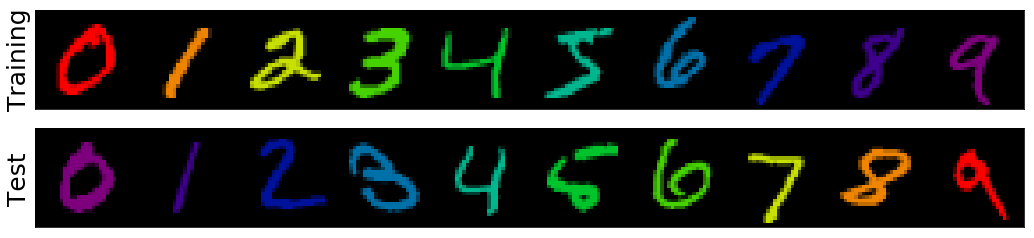

In [5]:
fig, axes = plt.subplots(nrows= 2, figsize = (20, 4))
indices = []
for i in range(10):
    indices.append(np.where(y_train ==i)[0][0])
ex_imgs = np.hstack(x_train[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) 

axes[0].imshow(ex_imgs);

axes[0].set_ylabel("Training", fontsize = 25)
# axes[0].set_title("Training set", fontsize = 30,loc  = 'left')
indices = []
for i in range(10):
    indices.append(np.where(y_test ==i)[0][0])
ex_imgs = np.hstack(x_test[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) 

axes[1].imshow(ex_imgs);
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_ylabel("Test", fontsize = 25)
fig.savefig(oj(save_path, "ColorMNIST_examples"))


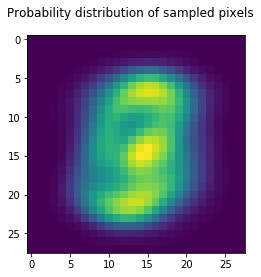

In [11]:
plt.imshow(((x_train).sum(axis = 1)).mean(axis = 0))
plt.suptitle("Probability distribution of sampled pixels");